# Bool
закодировать
# Questions
result_name оставить нул?

# Импорт основных библиотек и датасета

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# graph
import networkx as nx
from pyvis.network import Network

In [2]:
PATHES = ["./with_closed_ations_as________select_app_2018_X5_STORES.csv", "./with_closed_ations_as________select_app_2019_X5_STORES.csv", "./with_closed_ations_as________select_app_2020_X5_STORES.csv"]
# df = pd.read_csv(PATH)
df = pd.DataFrame()
for path in PATHES:
    df1 = pd.read_csv(path)
    df = pd.concat([df, df1])
    
df['action_date'] = pd.to_datetime(df['action_date'])
df = df[df['position_name'] == 'Продавец-кассир']

C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# изменение bool значений

In [3]:
df["is_active_action"] = df.is_active_action.replace({True: 1, False: 0})
df["is_open_action"] = df.is_open_action.replace({True: 1, False: 0})
df

,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
0,3080432,2883423,-1,9044,2018-10-16 18:11:10.003180+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
1,2873477,2761171,-1,32087,2018-08-15 10:36:32.936322+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
2,2896621,2776555,-1,32087,2018-08-22 14:09:27.083354+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
3,2906437,2782282,-1,32087,2018-08-24 15:55:27.912704+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
4,2965200,2816229,-1,32087,2018-09-11 15:00:49.242929+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
...,...,...,...,...,...,...,...,...,...,...,...
739675,4825142,2952699,-1,32061,2020-04-23 16:26:11.809180+00:00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,1,1
739676,4736341,936507,-1,32061,2020-04-23 16:26:11.809180+00:00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,1,1
739678,4782853,2753502,-1,32110,2020-04-23 16:26:11.809180+00:00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,1,1
739679,4769924,3823657,-1,32110,2020-04-23 16:26:11.809180+00:00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,1,1


# Статистика

In [4]:
df = df[df['is_active_action'] == 1]

In [5]:
# Сортируем по аппликантам и по времени
df.sort_values(by=['id_applicant','action_date'], ascending = [False,True], inplace = True)
df.reset_index(drop = True, inplace = True)

# action_time
indexes = pd.RangeIndex(len(df) - 1)
df['action_time'] = (df.iloc[indexes + 1]['action_date'].reset_index(drop = True) - df['action_date']).dt.total_seconds()/60/60/24 # In days
df['action_time'].iloc[df[df['id_applicant'] !=  df.iloc[indexes+1].append({'id_applicant': 0}, ignore_index = True)['id_applicant'].reset_index(drop = True)].index] = None

C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [6]:
df['is_fits'] = 0
df.loc[df['result_name'] == 'Принят', 'is_fits'] = 1
df['is_fits'].mean()

C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


0.018807529887609212

In [7]:
applicants_fits =  df.groupby(['id_applicant'])['is_fits'].sum()
applicants_fits.describe()

count    1.733977e+06
mean     1.161053e-01
std      3.206698e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.000000e+00
Name: is_fits, dtype: float64

In [8]:
df['id_applicant'][df['id_applicant'].isin(applicants_fits[applicants_fits > 2].index)].unique()
# Очень странные значения!!! Когда два раза принимают там в основном второе оформление - после выхода на работу
# Можете смотреть тут
# df[df['id_applicant'].isin([4041842])]

array([2859958], dtype=int64)

In [9]:
df_fits = df[df['id_applicant'].isin(applicants_fits[applicants_fits > 0].index)].reset_index()
df_fits = df_fits[df_fits['is_active_action'] == 1]
df_fits.describe()

,index,id_applicant,id_partner,id_log,department_id,is_active_action,is_open_action,action_time,is_fits
count,2.400247e+06,2.400247e+06,2.400247e+06,2.400247e+06,2.400247e+06,2400247.0,2.400247e+06,2.199099e+06,2.400247e+06
mean,5.329407e+06,3.280235e+06,2.709437e+06,1.577098e+07,2.203810e+04,1.0,6.249357e-06,1.191580e+00,8.387637e-02
std,2.899277e+06,6.037361e+05,6.683275e+05,5.887423e+06,1.214382e+04,0.0,2.499864e-03,7.970328e+00,2.772024e-01
min,0.000000e+00,2.196746e+06,5.305870e+05,-1.000000e+00,5.637000e+03,1.0,0.000000e+00,1.396991e-08,0.000000e+00
25%,2.808272e+06,2.775263e+06,2.497976e+06,1.347877e+07,1.008500e+04,1.0,0.000000e+00,1.080026e-05,0.000000e+00
50%,5.312441e+06,3.290447e+06,2.818420e+06,1.643617e+07,2.406800e+04,1.0,0.000000e+00,9.651384e-05,0.000000e+00
75%,7.814420e+06,3.759099e+06,3.181783e+06,1.967039e+07,3.217700e+04,1.0,0.000000e+00,7.662988e-01,0.000000e+00
max,1.070443e+07,4.886615e+06,3.897229e+06,2.710603e+07,4.985900e+04,1.0,1.000000e+00,8.111587e+02,1.000000e+00


In [10]:
len(df_fits['id_applicant'].unique())

201148

In [11]:
df_fits['Date_int'] = df_fits['action_date'].values.astype('int64')
partner_applicant =  df_fits.groupby(['id_partner','id_applicant'])['Date_int'].max().reset_index()
amount_applicant =  partner_applicant.groupby(['id_partner'])['Date_int'].max().reset_index()
partner_applicant = partner_applicant[partner_applicant['Date_int'].isin(amount_applicant['Date_int'])]

df_fits = df_fits[df_fits['id_applicant'].isin(partner_applicant['id_applicant'])].reset_index(drop = True)

In [12]:
len(df_fits['id_applicant'].unique())

193767

In [13]:
# applicant_min =  df_fits.groupby(['id_applicant'])['action_date'].min().reset_index()
fits_max =  df_fits[df_fits['result_name'] == 'Принят'].groupby(['id_applicant'])['action_date'].max().reset_index()
fits_max

# unused for now
# new_tth = pd.DataFrame(applicant_min).drop(columns = 'action_date')
# new_tth['tth'] = (fits_min['action_date'] - applicant_min['action_date']).dt.total_seconds()/60/60/24

,id_applicant,action_date
0,2196746,2018-02-01 23:04:53.450437+00:00
1,2196747,2018-01-11 09:51:21.213384+00:00
2,2196748,2018-02-02 12:41:49.992103+00:00
3,2196752,2018-01-22 11:43:14.342473+00:00
4,2196753,2018-01-15 10:32:20.674998+00:00
...,...,...
193762,4886560,2020-04-14 11:04:44.553692+00:00
193763,4886575,2020-04-14 11:06:42.313671+00:00
193764,4886579,2020-04-14 11:07:06.756809+00:00
193765,4886599,2020-04-14 11:08:17.306195+00:00


In [14]:
df_fits.loc[df_fits['action_date'].isin(fits_max['action_date']) & (df_fits['action_time'].notna()), 'after_fit'] = 1
while True:
    after_indexes = df_fits[(df_fits['action_time'].notna())& (df_fits['after_fit'] == 1)].index
    after_fit_mask = (df_fits.index.isin(after_indexes + 1) & (df_fits['action_time'].notna())) & df_fits['after_fit'].isna()
    print(len(df_fits.loc[after_fit_mask]))
    if len(df_fits.loc[after_fit_mask]) == 0:
        break
    df_fits.loc[after_fit_mask, 'after_fit'] = 1

244
201
186
172
159
153
70
26
16
16
14
14
10
9
0


In [15]:
# partner_applicant =  df_fits.groupby(['id_partner','id_applicant']).size().reset_index()
# amount_applicant =  partner_applicant.groupby(['id_partner'])['id_applicant'].count().reset_index()
# partner_applicant.set_index('id_partner', inplace = True)
# amount_applicant[amount_applicant['id_applicant']>2]

# amount_applicant['id_partner'][amount_applicant['id_applicant']>2].array

In [16]:
# df_fits.loc[df_fits.index.isin(after_indexes + 1) & (df_fits['action_time'].notna()),'after_fit'] = 1
# ['after_fit']

In [17]:
df_fits.loc[df_fits['after_fit'] == 1, 'action_time'] = 0

In [18]:
df_fits[df_fits['id_applicant']== 4886560]

,index,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action,action_time,is_fits,Date_int,after_fit
40,140,4886560,1197774,-1,35106,2020-04-14 11:04:14.792897+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0,0.000194,0,1586862254792897000,NaN
41,141,4886560,1197774,27105772,35106,2020-04-14 11:04:31.540786+00:00,Обработка,Провести первичную обработку,Подходит,Продавец-кассир,1,0,0.000014,0,1586862271540786000,NaN
42,142,4886560,1197774,27105774,35106,2020-04-14 11:04:32.775293+00:00,Обработка,Проверка формы обращения,Не резерв,Продавец-кассир,1,0,0.000017,0,1586862272775293000,NaN
43,143,4886560,1197774,27105775,35106,2020-04-14 11:04:34.239576+00:00,Интервью с руководителем,Назначить интервью с руководителем,Встреча назначена,Продавец-кассир,1,0,0.000014,0,1586862274239576000,NaN
44,144,4886560,1197774,27105777,35106,2020-04-14 11:04:35.442680+00:00,Интервью с руководителем,Узнать результаты интервью с руководителем,Подходит,Продавец-кассир,1,0,0.000013,0,1586862275442680000,NaN
45,145,4886560,1197774,27105778,35106,2020-04-14 11:04:36.590168+00:00,СБ,Подготовить анкету кандидата,Подготовлена,Продавец-кассир,1,0,0.000011,0,1586862276590168000,NaN
46,146,4886560,1197774,27105779,35106,2020-04-14 11:04:37.511006+00:00,СБ,Узнать результаты СБ,Подходит,Продавец-кассир,1,0,0.000015,0,1586862277511006000,NaN
47,147,4886560,1197774,27105781,35106,2020-04-14 11:04:38.764145+00:00,СБ,Проверка формы обращения,Не резерв,Продавец-кассир,1,0,0.000017,0,1586862278764145000,NaN
48,148,4886560,1197774,27105783,35106,2020-04-14 11:04:40.266221+00:00,Оформление,Назначить время на оформление,Время назначено,Продавец-кассир,1,0,0.000050,0,1586862280266221000,NaN
49,149,4886560,1197774,27105784,35106,2020-04-14 11:04:44.553692+00:00,Оформление,Узнать результаты приема,Принят,Продавец-кассир,1,0,NaN,1,1586862284553692000,NaN


In [19]:
applicants_g =  df_fits.dropna(subset=['action_time']).groupby(['id_applicant'])['action_time'].sum()
applicants_g.describe()

count    193767.000000
mean         13.005490
std          26.229788
min           0.000000
25%           4.304742
50%           7.926343
75%          14.194359
max         811.159243
Name: action_time, dtype: float64

In [20]:
# applicants_g =  df_fits.dropna(subset=['action_time']).groupby(['id_applicant'])['action_time', 'is_fits'].sum()
# applicants_g[applicants_g['is_fits']>0].describe()

In [21]:
# applicants_g[applicants_g['is_fits']==0].describe()

In [22]:
# df['action_time'][df['action_time'] < 0] = None
stage_threshold = 0
stages_g =  df_fits.dropna(subset=['action_time']).groupby(['stage_name'])['action_time'].describe() # ['stage_name', 'activity_name']
stages_g[stages_g['count'] > stage_threshold]

,count,mean,std,min,25%,50%,75%,max
stage_name,,,,,,,,
Выход на работу,156.0,1.092758,2.533857,0.000000,0.000000,0.004903,1.224158,21.760230
Гайд-интервью,4.0,0.000011,0.000002,0.000009,0.000010,0.000011,0.000012,0.000013
Групповое собеседование и тестирование,6.0,0.000010,0.000002,0.000007,0.000009,0.000010,0.000012,0.000013
Интервью с руководителем,470750.0,0.563862,9.275355,0.000000,0.000008,0.000011,0.000015,811.158711
Кадровый резерв,4.0,0.000013,0.000011,0.000007,0.000008,0.000009,0.000014,0.000030
Мы отказали,22.0,0.308741,1.448064,0.000006,0.000008,0.000012,0.000015,6.792035
Назначение времени на оформление/медосмотр,205262.0,2.588660,6.868024,0.000000,0.000112,0.815712,3.013660,433.256890
Не прошел СБ,382.0,0.022709,0.211153,0.000000,0.000009,0.000011,0.000014,3.742623
Обработка,348531.0,0.172193,6.452844,0.000000,0.000009,0.000011,0.000014,565.056308


In [23]:
activity_threshold = 0
activities_g =  df_fits.dropna(subset=['action_time']).groupby(['activity_name'])['action_time'].describe()
activities_g[activities_g['count'] > activity_threshold]

,count,mean,std,min,25%,50%,75%,max
activity_name,,,,,,,,
Вернуть в воронку,8777.0,0.242731,2.267561e+00,0.000000,0.000062,0.000159,0.000346,113.246137
Вывести из черного списка,5.0,0.000208,1.429926e-04,0.000006,0.000114,0.000274,0.000297,0.000349
Назначить время для гайд-интервью,2.0,0.000012,7.476836e-07,0.000012,0.000012,0.000012,0.000012,0.000013
Назначить время на оформление,8211.0,1.034397,1.984597e+00,0.000022,0.000065,0.000233,1.043698,18.966384
Назначить время на оформление/медосмотр,218463.0,2.241734,5.549731e+00,0.000000,0.000132,0.226812,2.831923,433.256890
Назначить время на оформление/медосмотр (недозвон),124348.0,2.979320,7.469298e+00,0.000000,0.000076,0.828630,3.230943,392.058357
Назначить групповое собеседование и тестирование,2.0,0.000008,1.037589e-06,0.000007,0.000008,0.000008,0.000008,0.000009
Назначить интервью с руководителем,225710.0,0.626637,9.179090e+00,0.000000,0.000009,0.000011,0.000015,811.158711
Подготовить анкету кандидата,220390.0,1.376653,1.224314e+01,0.000000,0.000013,0.175961,0.832853,527.944208


In [24]:
result_threshold = 0
results_g =  df_fits.dropna(subset=['action_time']).groupby(['result_name'])['action_time'].describe()
results_g[results_g['mean'] > 1]

,count,mean,std,min,25%,50%,75%,max
result_name,,,,,,,,
В ожидании,153482.0,3.158289,5.908128,0.000000,1.016673,1.918097,3.894268,520.710384
Время назначено,191517.0,1.840695,4.353546,0.000000,0.000073,0.000276,2.811733,291.880512
Кадровый резерв,197.0,1.882064,7.805397,0.000008,0.000009,0.000011,0.000013,72.072166
Направлен на медосмотр,7438.0,4.059084,6.214250,0.000035,1.740861,2.116287,4.021579,148.137375
Не подходит,454.0,30.973591,49.373907,0.000021,9.190021,17.501866,32.610084,467.791808
Не получено,24.0,1.907678,2.560172,0.007971,0.077342,0.760203,2.788345,9.012896
Не принят,14.0,25.042870,38.841320,0.000000,7.308831,13.095907,28.450503,154.034348
Недозвон,143693.0,3.380745,9.124365,0.000000,0.249755,1.027225,3.153722,561.365339
Нет обратной связи,22849.0,3.343687,20.052129,0.000000,0.176681,0.923860,1.996873,532.894660


# Обнуляем время в результатах без предсказуемой последующей обработки

In [25]:
# Недозвон? Нет обратной связи? Ожидание?
results_empty = ['Резерв', 'Не подходит', 'Не принят', 'Отказ кандидата', 'Отказ руководителя', 'Принят', 'Кадровый резерв']
for res in results_empty:
    df_fits.loc[(df_fits['result_name'] == res) & df_fits['action_time'].notna(), 'action_time'] = 0
    
df_fits.loc[(df_fits['stage_name'] == 'Создание кандидата') & df_fits['action_time'].notna(), 'action_time'] = 0

In [26]:
df_tth =  df_fits.dropna(subset=['action_time']).groupby(['id_applicant', 'id_partner', 'department_id'])['action_time'].sum().reset_index()
df_tth.rename(columns={"action_time": "TTH"}, inplace = True)
# df_tth['TTH'].to_excel('TTH.xlsx')
# df_tth = pd.merge(df_tth, df_fits[['id_applicant', 'id_partner']], how = 'right', on="id_applicant")
# df_tth = df_tth.join(df_fits.set_index('id_applicant')['id_partner'], on='id_applicant')
df_tth

,id_applicant,id_partner,department_id,TTH
0,2196746,2393754,6715,27.685659
1,2196747,2314693,12252,6.133310
2,2196748,2346300,5760,28.251127
3,2196752,2393757,32391,17.202996
4,2196753,2393758,32156,10.153854
...,...,...,...,...
193762,4886560,1197774,35106,0.000151
193763,4886575,1542748,28162,0.000176
193764,4886579,3878216,10530,0.000182
193765,4886599,3884467,48259,0.000218


In [27]:
df_tth_dep =  df_fits.dropna(subset=['action_time']).groupby(['id_applicant', 'department_id'])['action_time'].count().reset_index()
# df_tth_dep = df_tth_dep.join(df_tth.set_index('id_applicant'), on='id_applicant')
# df_tth_dep = pd.merge(df_tth_dep, df_tth[['id_applicant','action_time']], how = 'left', on="id_applicant")
df_tth_dep = df_tth_dep.groupby(['department_id']).agg({'id_applicant':'count', 'action_time':'median'}).reset_index()
# df_tth_dep.to_excel('TTH_DEP.xlsx')
df_tth_dep.rename(columns={"id_applicant": "applicants","action_time": "TTH_median"}, inplace = True)
df_tth_dep

,department_id,applicants,TTH_median
0,5637,10,9.5
1,5638,4,9.0
2,5639,20,12.0
3,5640,6,12.5
4,5641,8,9.0
...,...,...,...
15545,49707,2,13.5
15546,49711,9,9.0
15547,49722,5,9.0
15548,49734,2,9.0


<AxesSubplot:xlabel='applicants', ylabel='TTH_median'>

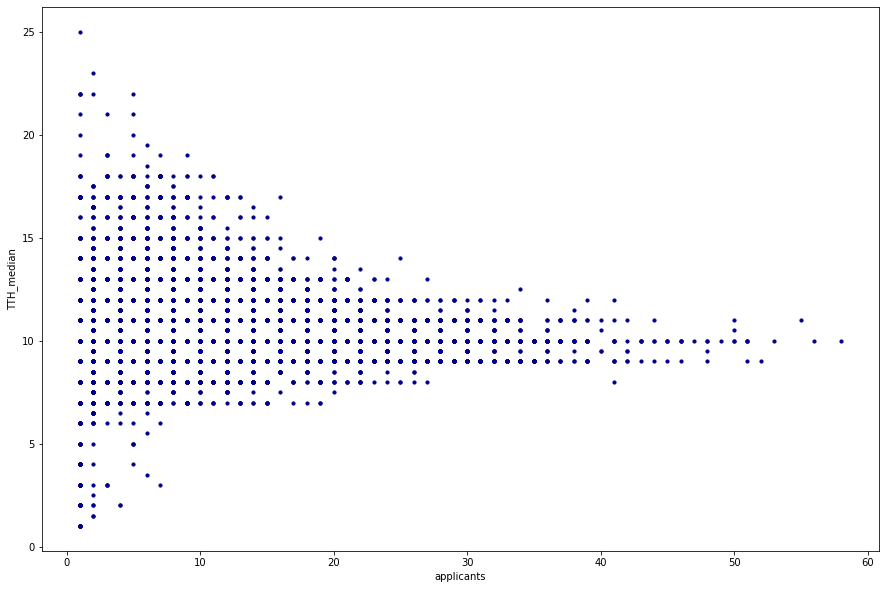

In [28]:
df_tth_dep.plot.scatter(x='applicants', y='TTH_median', c='DarkBlue', s=10,figsize=(15,10))

In [29]:
# df_fits[df_fits['activity_name'] == 'Назначить время на оформление/медосмотр']
df_test_g = df_fits[df_fits['activity_name'] == 'Назначить время на оформление/медосмотр'].groupby(['id_applicant','activity_name']).index.count().reset_index()
df_test_g[df_test_g['index']>2]

,id_applicant,activity_name,index
14307,2400293,Назначить время на оформление/медосмотр,3
14989,2408644,Назначить время на оформление/медосмотр,3
15009,2409004,Назначить время на оформление/медосмотр,3
15648,2418566,Назначить время на оформление/медосмотр,3
15891,2420271,Назначить время на оформление/медосмотр,3
...,...,...,...
183976,4150755,Назначить время на оформление/медосмотр,3
184197,4155059,Назначить время на оформление/медосмотр,3
184212,4155233,Назначить время на оформление/медосмотр,3
184290,4157473,Назначить время на оформление/медосмотр,3


In [30]:
# df_fits[df_fits['id_applicant'] == 4150755]

In [31]:
def addTimeToDF(df, column_name, result_name, new_res_name, temp):
    temp = df_fits[df_fits[column_name]==result_name]
    temp = temp.dropna(subset=['action_time']).groupby(['id_applicant'])['action_time'].sum().reset_index()
    temp = temp.rename(columns={"action_time": new_res_name})
    df = pd.merge(df, temp, how = 'left', on="id_applicant")
    df.fillna(value = {new_res_name:0}, inplace = True)
    return df

In [32]:
fits_min =  df_fits[df_fits['result_name'] == 'Принят'].groupby(['id_applicant'])['action_date'].min().reset_index()

In [50]:
# Был ли чел в резерве
temp_df = df[df['stage_name']=='Резерв'].id_partner.unique()
df_reg = df_tth.reset_index(drop=True)
df_reg['Reserv'] = 0
df_reg.loc[df_reg['id_partner'].isin(temp_df), 'Reserv']= 1

# Сезонность? (В какой месяц?) - 11 бинарных переменных
df_reg = pd.merge(df_reg, fits_min[['id_applicant','action_date']], how = 'left', on="id_applicant")
df_reg['month_start'] = df_reg['action_date'].dt.month
df_reg['year_start'] = df_reg['action_date'].dt.year - 2018
df_reg = df_reg.drop(['action_date'] , axis=1)

temp_df = pd.get_dummies(df_reg["month_start"]).rename(columns=lambda x: 'month '+str(x))
temp_df = pd.concat((pd.get_dummies(df_reg["year_start"]).rename(columns=lambda x: 'year '+str(x)),temp_df), axis=1)
df_reg =  pd.concat((temp_df, df_reg), axis=1)
df_reg = df_reg.drop(['month_start'] , axis=1)
df_reg = df_reg.drop(['year_start'] , axis=1)

# Департаменты? (количество нанятых в департаменте)
df_reg = pd.merge(df_reg, df_tth_dep[['department_id','applicants']], how = 'left', on="department_id")
df_reg = df_reg.rename(columns={"applicants": "dep_applicants"})

# Узнать результаты интервью с руководителем (Время) / Нет обратной связи (От руководителя) - ожидание
#  Узнать результаты интервью с руководителем
df_reg = addTimeToDF(df_reg, 'activity_name','Узнать результаты интервью с руководителем', "interview_result_time", temp_df)
#  Нет обратной связи от руководителя
df_reg = addTimeToDF(df_reg, 'result_name','Нет обратной связи от руководителя', "no_interview_info_time", temp_df)
#  Узнать результаты интервью с руководителем
df_reg = addTimeToDF(df_reg, 'stage_name','Оформление', "oform_time", temp_df)

# Источник Яндекс цифра
df_reg['yandex_source'] = 0
# yandex_source id_applicants
temp_df = df.loc[df['result_name']=='Источник Яндекс Цифра', 'id_applicant'].unique() 
df_reg.loc[df_reg['id_applicant'].isin(temp_df), 'yandex_source'] = 1

# Сколько раз повторяются этапы на стадии (activity + stage name)
temp_df = df_fits.groupby(['id_applicant', 'activity_name', 'stage_name'])['action_date'].count().reset_index()
temp_df = temp_df.rename(columns={"action_date": "amount"})
temp_df = temp_df[temp_df['amount']>1]
df_reg = pd.merge(df_reg, temp_df.groupby(['id_applicant'])['amount'].sum(), how = 'left', on="id_applicant")
# df_reg.fillna(value = {"amount":0}, inplace = True)
df_reg = df_reg.rename(columns={"amount": "amount_over_2calls"})
df_reg = pd.merge(df_reg, temp_df.groupby(['id_applicant'])['amount'].count(), how = 'left', on="id_applicant")
# df_reg.fillna(value = {"amount":0}, inplace = True)
df_reg = df_reg.rename(columns={"amount": "count_over_2calls"})
df_reg['mean_over_2calls'] = df_reg['amount_over_2calls'] / df_reg['count_over_2calls']
df_reg = df_reg.fillna(0)

# Количество стадий
temp_df = df_fits.groupby(['id_applicant', 'stage_name'])['action_date'].count().reset_index()
temp_df = temp_df.groupby(['id_applicant']).agg({'action_date': ['sum','count']}).reset_index()
temp_df.columns = temp_df.columns.droplevel(1)
temp_df.columns.values[1] = "steps_amount"
temp_df.columns.values[2] = "stages_amount"
df_reg = pd.merge(df_reg, temp_df, how = 'left', on="id_applicant")

# temp_df
# df_reg.isna().sum()
df_reg

,year 0,year 1,year 2,month 1,month 2,month 3,month 4,month 5,month 6,month 7,...,dep_applicants,interview_result_time,no_interview_info_time,oform_time,yandex_source,amount_over_2calls,count_over_2calls,mean_over_2calls,steps_amount,stages_amount
0,1,0,0,0,1,0,0,0,0,0,...,5,0.000007,0.0,16.234855,0,4.0,1.0,4.0,11,6
1,1,0,0,1,0,0,0,0,0,0,...,13,0.000007,0.0,0.000000,0,0.0,0.0,0.0,9,6
2,1,0,0,0,1,0,0,0,0,0,...,8,0.000006,0.0,0.000000,0,0.0,0.0,0.0,8,6
3,1,0,0,1,0,0,0,0,0,0,...,19,0.000006,0.0,10.011920,0,7.0,2.0,3.5,15,6
4,1,0,0,1,0,0,0,0,0,0,...,14,0.000006,0.0,3.773867,0,4.0,2.0,2.0,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193762,0,0,1,0,0,0,1,0,0,0,...,18,0.000013,0.0,0.000050,0,0.0,0.0,0.0,10,5
193763,0,0,1,0,0,0,1,0,0,0,...,27,0.000016,0.0,0.000068,0,0.0,0.0,0.0,10,5
193764,0,0,1,0,0,0,1,0,0,0,...,50,0.000015,0.0,0.000056,0,0.0,0.0,0.0,10,5
193765,0,0,1,0,0,0,1,0,0,0,...,1,0.000021,0.0,0.000065,0,0.0,0.0,0.0,10,5


In [51]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

xColumn = df_reg.columns
yColumn = "TTH"
mask = np.isin(xColumn, ['id_partner', 'department_id', 'id_applicant', 'TTH', 'year 0', 'year 1', 'year 2', 'month 12', 'yandex_source'], invert = True)
xColumn = xColumn[mask]

scaler = preprocessing.MinMaxScaler()
df_reg2 = df_reg.loc[:, df_reg.columns != 'TTH']
df_reg.loc[:, df_reg.columns != 'TTH'] = pd.DataFrame(scaler.fit_transform(df_reg2), columns=df_reg2.columns, index = df_reg2.index.values)

treshold_down = 1
treshold_up = 60
X_train, X_test, Y_train, Y_test = train_test_split(df_reg.loc[(df_reg['TTH']<treshold_up)&(df_reg['TTH']>treshold_down),xColumn], df_reg.loc[(df_reg['TTH']<treshold_up)&(df_reg['TTH']>treshold_down),yColumn], test_size=0.2)

In [58]:
from sklearn import linear_model
from sklearn import metrics

classifiers = [
    linear_model.BayesianRidge(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

for classifier in classifiers:
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    print(metrics.r2_score(Y_test, Y_pred))

0.46125759967127977
0.4612954559754714
0.3809354308143418
0.45770521446237644
0.4612612284030294


In [55]:
classifier = linear_model.ARDRegression()
reg_results = classifier.fit(X_train, Y_train)
reg_coef = pd.DataFrame(data=classifier.coef_, index = xColumn)
reg_coef.sort_values(by=[0], ascending=[False], inplace = True)
print(reg_coef)

                                 0
interview_result_time   527.724854
oform_time              414.566691
amount_over_2calls       74.079537
stages_amount            18.308254
month 3                  -0.381953
month 5                  -1.104384
month 8                  -1.318514
month 2                  -1.592461
month 4                  -1.654523
month 6                  -1.729130
month 1                  -1.805427
month 7                  -1.900339
month 9                  -2.047391
month 10                 -2.234913
month 11                 -2.245503
Reserv                   -2.947178
dep_applicants           -3.226992
no_interview_info_time   -6.565745
steps_amount            -17.137543
mean_over_2calls        -25.481359
count_over_2calls       -29.896180


In [56]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

lr= LinearRegression()

X_train_c = sm.add_constant(X_train)

model = sm.OLS(Y_train,X_train_c)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TTH   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     5301.
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:26:32   Log-Likelihood:            -4.3127e+05
No. Observations:              129359   AIC:                         8.626e+05
Df Residuals:                  129337   BIC:                         8.628e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2.9237      0.181     16.137      0.000       2.569       3.279
month 1                   -1.9174      0.143    -13.393      0.000      -2.198      -1.637
month 2                   -1.7034      0.134    -12.697      0.000      -1.966      -1.440
month 3                   -0.4994      0.131     -3.801      0.000      -0.757      -0.242
month 4                   -1.7639      0.128    -13.747      0.000      -2.015      -1.512
month 5                   -1.2170      0.131     -9.263      0.000      -1.475      -0.960
month 6                   -1.8406      0.131    -13.997      0.000      -2.098      -1.583
month 7                   -2.0115      0.130    -15.449      0.000      -2.267      -1.756
month 8                   -1.4303      0.131    -10.913      0.000      -1.687      -1.173
month 9                   -2.1579      0.131    -16.449      0.000      -2.415      -1.901
month 10                  -2.3440      0.129    -18.132      0.000      -2.597      -2.091
month 11                  -2.3553      0.138    -17.083      0.000      -2.626      -2.085
Reserv                    -3.0487      0.554     -5.504      0.000      -4.134      -1.963
dep_applicants            -3.2320      0.133    -24.315      0.000      -3.493      -2.971
interview_result_time    527.6808      5.751     91.760      0.000     516.410     538.952
no_interview_info_time    -6.6138      0.666     -9.931      0.000      -7.919      -5.308
oform_time               414.4852      1.544    268.452      0.000     411.459     417.511
amount_over_2calls        74.1509      1.126     65.852      0.000      71.944      76.358
count_over_2calls        -29.9355      0.450    -66.586      0.000     -30.817     -29.054
mean_over_2calls         -25.4917      0.445    -57.241      0.000     -26.365     -24.619
steps_amount             -17.1397      0.736    -23.286      0.000     -18.582     -15.697
stages_amount             18.3285      0.199     91.985      0.000      17.938      18.719
==============================================================================
Omnibus:                    83582.877   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1064462.194
Skew:                           2.991   Prob(JB):                         0.00
Kurtosis:                      15.716   Cond. No.                         395.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

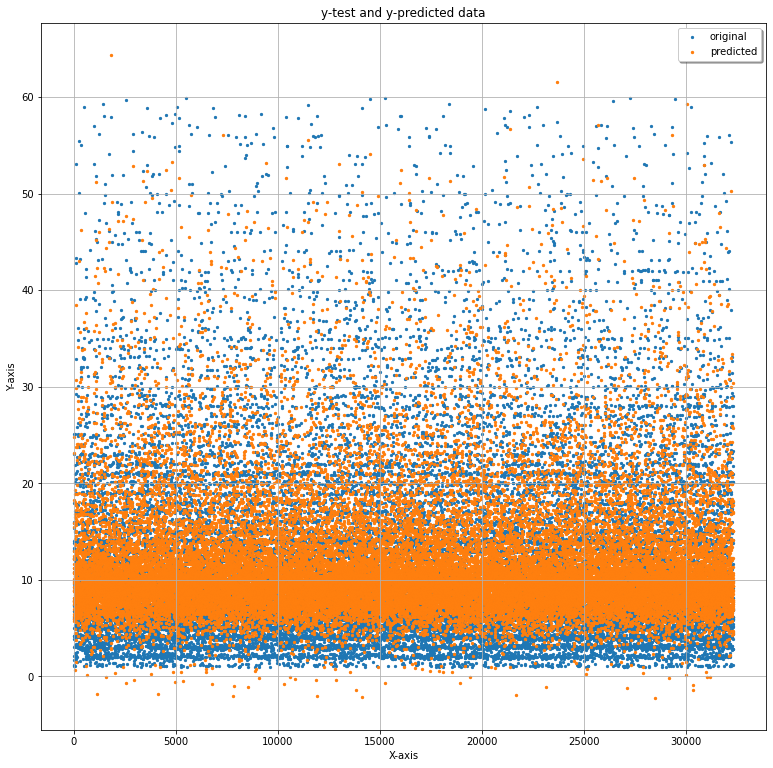

In [57]:
x_ax = range(len(Y_test))
X_test_c = sm.add_constant(X_test)
Y_pred = fitted_model.predict(X_test_c)
plt.subplots(figsize=(13,13))
plt.scatter(x_ax, Y_test, linewidth=1, label="original",s=5)
plt.scatter(x_ax, Y_pred, linewidth=1.1, label="predicted",s=5)
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

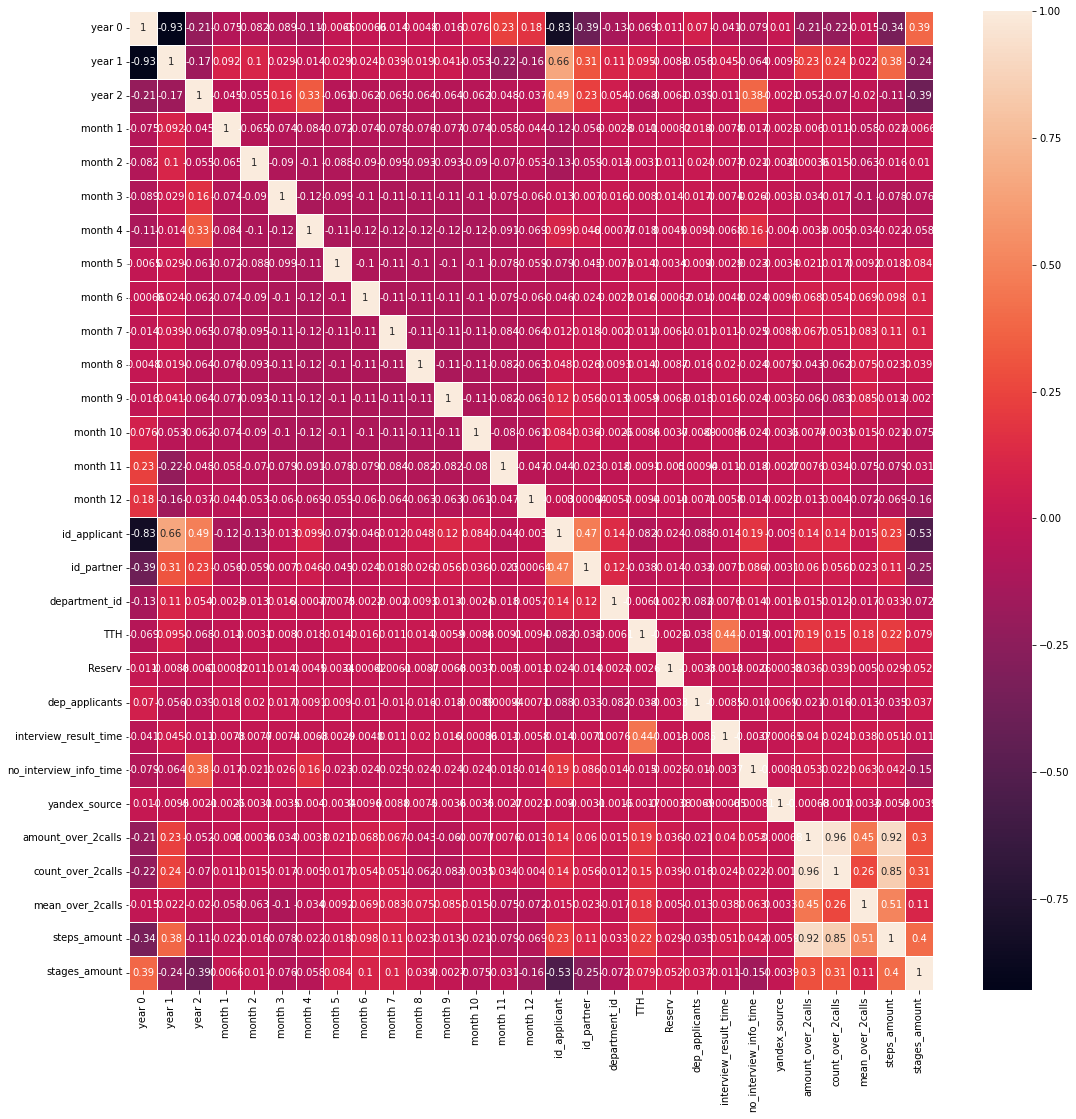

In [122]:
import seaborn as sns
plt.subplots(figsize=(18,18))
sns.heatmap(df_reg.corr(),annot=True,linewidths = 1)
plt.show()

In [130]:
df_tth

,id_applicant,id_partner,TTH
0,2196746,2393754,27.685659
1,2196747,2314693,6.133310
2,2196748,2346300,28.251127
3,2196752,2393757,17.202996
4,2196753,2393758,10.153854
...,...,...,...
193762,4886560,1197774,0.000151
193763,4886575,1542748,0.000176
193764,4886579,3878216,0.000182
193765,4886599,3884467,0.000218


In [46]:
stages_g =  df_fits.dropna(subset=['action_time']).groupby(['stage_name'])['action_time'].describe() # ['stage_name', 'activity_name']
stages_g['sum'] = stages_g['mean'] * stages_g['count']
stages_g

,count,mean,std,min,25%,50%,75%,max,sum
stage_name,,,,,,,,,
Выход на работу,156.0,1.078194,2.533568,0.000000,0.000000,0.004620,1.185274,21.760230,168.198321
Гайд-интервью,4.0,0.000011,0.000002,0.000009,0.000010,0.000011,0.000012,0.000013,0.000044
Групповое собеседование и тестирование,6.0,0.000010,0.000002,0.000007,0.000009,0.000010,0.000012,0.000013,0.000062
Интервью с руководителем,470750.0,0.554103,9.122335,0.000000,0.000008,0.000011,0.000015,618.209540,260843.799030
Кадровый резерв,4.0,0.000013,0.000011,0.000007,0.000008,0.000009,0.000014,0.000030,0.000054
Мы отказали,22.0,0.308741,1.448064,0.000006,0.000008,0.000012,0.000015,6.792035,6.792300
Назначение времени на оформление/медосмотр,205262.0,2.538058,6.628507,0.000000,0.000106,0.803150,2.998456,430.056809,520966.805882
Не прошел СБ,382.0,0.022709,0.211153,0.000000,0.000009,0.000011,0.000014,3.742623,8.674995
Обработка,348531.0,0.163508,6.332038,0.000000,0.000009,0.000011,0.000014,565.056308,56987.699728


In [47]:
# df_fits[df_fits['id_applicant']==4146514]

In [48]:
# df_fits[df_fits['activity_name']=='Узнать результаты медосмотра']

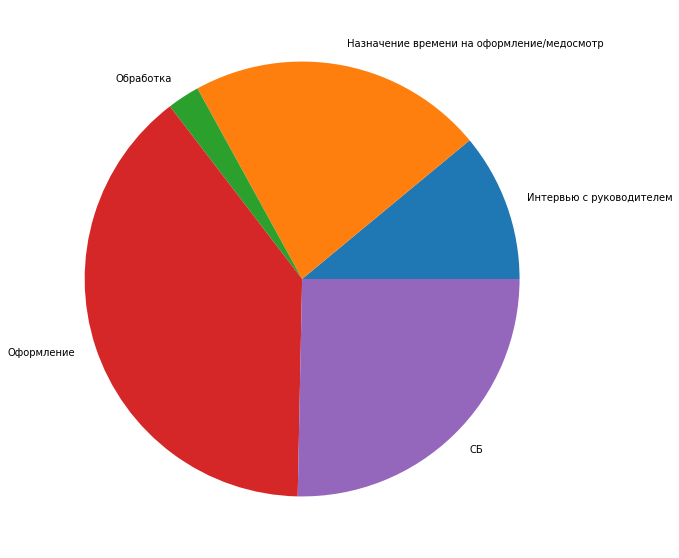

In [49]:
stage_pie_mask = stages_g['sum'] > 2200
stage_sum =stages_g[stage_pie_mask]['sum'].sum()
stage_sum

y = stages_g[stage_pie_mask]['sum'] / stage_sum
mylabels = stages_g[stage_pie_mask].index

plt.subplots(1, 1,figsize=(15,10))
plt.pie(y, labels = mylabels)
plt.show() 

In [91]:
# df_stage_activ = df_fits.dropna(subset=['action_time']).groupby(['stage_name', 'activity_name']).describe().reset_index
# df_stage_activ[]

In [92]:
# df_stage_result = df_fits.dropna(subset=['action_time']).groupby(['stage_name', 'result_name']).count().reset_index()
# df_stage_result[df_stage_result['stage_name']=='Оформление']

In [ ]:

reserved_applicants = df.loc[df['result_name']=="Кадровый резерв", 'id_applicant'].unique()
reserved_applicants= np.append(reserved_applicants, df.loc[df['stage_name']=="Кадровый резерв", 'id_applicant'].unique())
reserved_applicants = np.append(reserved_applicants, df.loc[df['stage_name']=="Резерв", 'id_applicant'].unique())
reserved_applicants = np.unique(reserved_applicants)

In [45]:
sb_c = 1
int_c = 1
df_sb_int = df_fits[(df_fits['id_applicant'].isin(reserved_applicants))& ((df_fits['stage_name']=='СБ') | (df_fits['stage_name']=='Интервью с руководителем'))]
df_sb_int = df_sb_int.groupby(['id_applicant', 'stage_name'])['action_time'].sum().reset_index()
df_sb_int = pd.merge(df_sb_int[df_sb_int['stage_name'] == 'Интервью с руководителем'], df_sb_int[df_sb_int['stage_name'] == 'СБ'], how = 'outer', on="id_applicant")
df_sb_int['action_time_x(short)'] = df_sb_int['action_time_x']
df_sb_int.loc[(df_sb_int['action_time_x(short)']>sb_c), 'action_time_x(short)'] = sb_c
df_sb_int['action_time_y(short)'] = df_sb_int['action_time_y']
df_sb_int.loc[df_sb_int['action_time_y(short)']>int_c, 'action_time_y(short)'] = int_c
df_sb_int.rename(columns = {'action_time_x':'interview_time', 'action_time_x(short)':'interview_time(short)','action_time_y':'sb_time', 'action_time_y(short)':'sb_time(short)'}, inplace = True)
df_sb_int = df_sb_int.drop(['stage_name_x','stage_name_y'] , axis=1)
# df_sb_int.to_excel('reserved.xlsx')

In [56]:
# nedozvon = df_fits[['id_applicant','action_date', 'action_time']][(df_fits['result_name'] == 'Недозвон')]
# nedozvon['action_date'] = nedozvon['action_date'].dt.tz_localize(None)
# nedozvon.to_excel('Nedozvon.xlsx')
sum_time_med_c = 3
sum_time_medN_c = 3
sum_time_res_c = 3
df_med = df_fits[(df_fits['activity_name'] == 'Назначить время на оформление/медосмотр')].groupby(['activity_name', 'id_applicant']).agg({'action_time': ['sum','count']}).reset_index()
df_med.columns = df_med.columns.droplevel(1)
df_med = df_med.drop('activity_name', axis=1)
df_med.columns.values[1] = "sum_time_med"
df_med.columns.values[2] = "count_time_med"
print(len(df_med))
df_med2 = df_fits[(df_fits['activity_name'] == 'Назначить время на оформление/медосмотр (недозвон)')].groupby(['activity_name', 'id_applicant']).agg({'action_time': ['sum','count']}).reset_index()
df_med2.columns = df_med2.columns.droplevel(1)
df_med2 = df_med2.drop('activity_name', axis=1)
df_med2.columns.values[1] = "sum_time_medN"
df_med2.columns.values[2] = "count_time_medN"
print(len(df_med2))
df_med =  pd.merge(df_med, df_med2, how = 'outer', on="id_applicant")
df_med2 = df_fits.dropna(subset=['action_time'])[(df_fits['activity_name'] == 'Узнать результаты приема')].groupby(['activity_name', 'id_applicant']).agg({'action_time': ['sum','count']}).reset_index()
df_med2.columns = df_med2.columns.droplevel(1)
df_med2 = df_med2.drop('activity_name', axis=1)
df_med2.columns.values[1] = "sum_time_res"
df_med2.columns.values[2] = "count_time_res"
print(len(df_med2))
df_med =  pd.merge(df_med, df_med2, how = 'outer', on="id_applicant")
df_med['sum_time_med(short)'] = df_med['sum_time_med']
df_med.loc[(df_med['sum_time_med(short)']>sum_time_med_c), 'sum_time_med(short)'] = sum_time_med_c
df_med['sum_time_medN(short)'] = df_med['sum_time_medN']
df_med.loc[df_med['sum_time_medN(short)']>sum_time_medN_c, 'sum_time_medN(short)'] = sum_time_medN_c
df_med['sum_time_res(short)'] = df_med['sum_time_res']
df_med.loc[df_med['sum_time_res(short)']>sum_time_res_c, 'sum_time_res(short)'] = sum_time_res_c
# df_med.to_excel('med_time.xlsx')

185069
80014


C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


80988


In [48]:
results_g =  df_fits.dropna(subset=['action_time']).groupby(['result_name'])['action_time'].describe()
# results_g
results_g

,count,mean,std,min,25%,50%,75%,max
result_name,,,,,,,,
В белый список,4.0,0.000259,0.000101,0.000114,0.000234,0.000286,0.000310,0.000349
В ожидании,153482.0,3.158289,5.908128,0.000000,1.016673,1.918097,3.894268,520.710384
Время назначено,191517.0,1.840695,4.353546,0.000000,0.000073,0.000276,2.811733,291.880512
Встреча назначена,224659.0,0.594591,8.826268,0.000000,0.000009,0.000011,0.000015,600.796568
Интервью с руководителем,482.0,0.507145,5.623006,0.000016,0.000107,0.000176,0.000488,113.246137
Источник Яндекс Цифра,27.0,0.496732,1.423606,0.000011,0.000198,0.034347,0.086146,7.030999
Источник не Яндекс Цифра,45338.0,0.144579,5.950515,0.000000,0.000011,0.000013,0.000017,469.080663
Кадровый резерв,197.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Назначить время на оформление/медосмотр,3179.0,0.302307,2.244807,0.000000,0.000129,0.000187,0.000383,38.193814


In [49]:
activities_g =  df_fits.dropna(subset=['action_time']).groupby(['activity_name'])['action_time'].describe()
activities_g

,count,mean,std,min,25%,50%,75%,max
activity_name,,,,,,,,
Вернуть в воронку,8777.0,0.242731,2.267561e+00,0.000000,0.000062,0.000159,0.000346,113.246137
Вывести из черного списка,5.0,0.000208,1.429926e-04,0.000006,0.000114,0.000274,0.000297,0.000349
Назначить время для гайд-интервью,2.0,0.000012,7.476836e-07,0.000012,0.000012,0.000012,0.000012,0.000013
Назначить время на оформление,8211.0,1.034397,1.984597e+00,0.000000,0.000065,0.000233,1.043698,18.966384
Назначить время на оформление/медосмотр,218463.0,2.228467,5.390705e+00,0.000000,0.000131,0.221104,2.827222,430.056809
Назначить время на оформление/медосмотр (недозвон),124348.0,2.915728,7.302221e+00,0.000000,0.000071,0.809676,3.174616,392.058357
Назначить групповое собеседование и тестирование,2.0,0.000008,1.037589e-06,0.000007,0.000008,0.000008,0.000008,0.000009
Назначить интервью с руководителем,225710.0,0.617507,8.965768e+00,0.000000,0.000009,0.000011,0.000015,600.796568
Подготовить анкету кандидата,220390.0,1.376653,1.224314e+01,0.000000,0.000013,0.175961,0.832853,527.944208


In [33]:
df_new_tth = df_tth.reset_index(drop = True)
# df_med
df_new_tth = pd.merge(df_new_tth, df_med, how = 'left', on="id_applicant")
df_new_tth.fillna(0, inplace = True)
df_new_tth['TTH'] = df_new_tth['TTH'] - (df_new_tth['sum_time_med'] - df_new_tth['sum_time_med(short)'] + df_new_tth['sum_time_medN'] - df_new_tth['sum_time_medN(short)'] + df_new_tth['sum_time_res'] - df_new_tth['sum_time_res(short)'])
df_new_tth = df_new_tth[['id_applicant','TTH']] 

# df_sb_int
df_new_tth = pd.merge(df_new_tth, df_sb_int, how = 'left', on="id_applicant")
df_new_tth.fillna(0, inplace = True)
df_new_tth['TTH'] = df_new_tth['TTH'] - (df_new_tth['sb_time'] - df_new_tth['sb_time(short)'] + df_new_tth['interview_time'] - df_new_tth['interview_time(short)'])
df_new_tth = df_new_tth[['id_applicant','TTH']] 


# df_new_tth.to_excel('TTH_NEW.xlsx')
df_tth_new_dep =  df_fits.dropna(subset=['action_time']).groupby(['id_applicant', 'department_id'])['action_time'].count().reset_index()
df_tth_new_dep = df_tth_new_dep.join(df_new_tth.set_index('id_applicant'), on='id_applicant')
df_tth_new_dep = df_tth_new_dep.groupby(['department_id'])['TTH'].median().reset_index()
df_tth_new_dep.to_excel('TTH_DEP_NEW.xlsx')
df_tth_new_dep.describe()


NameError: name 'df_med' is not defined

In [61]:
df_tth_dep['TTH'].quantile(.999)

56.877911979162576

In [62]:
def SetTTHLabels(table_name = 'TTH'):
    ax.set_title(table_name)
    ax.set_xlabel('TTH')
    ax.set_ylabel('Количество')

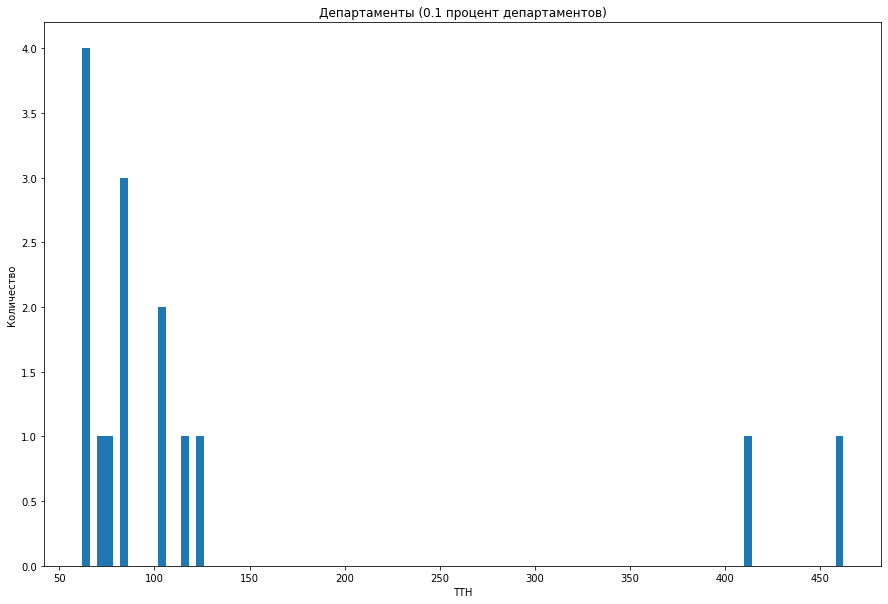

In [63]:
fig, ax = plt.subplots(1, 1,figsize=(15,10))
bins = 100
ax.hist(df_tth_dep['TTH'][(df_tth_dep['TTH']>60)],bins=bins)
SetTTHLabels('Департаменты (0.1 процент департаментов)')
plt.show()

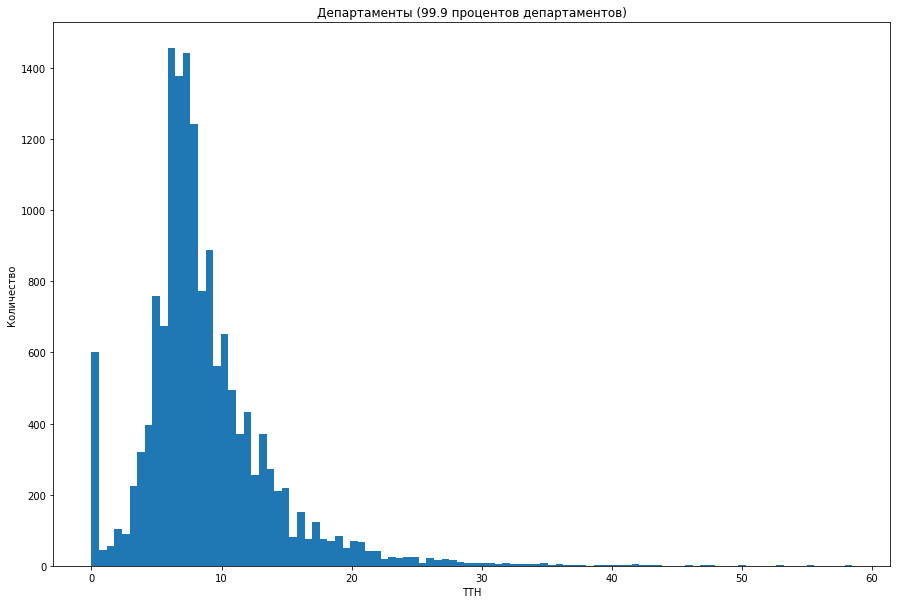

In [64]:
fig, ax = plt.subplots(1, 1,figsize=(15,10))
bins = 100
ax.hist(df_tth_dep['TTH'][(df_tth_dep['TTH']<=60)],bins=bins)
SetTTHLabels('Департаменты (99.9 процентов департаментов)')
plt.show()

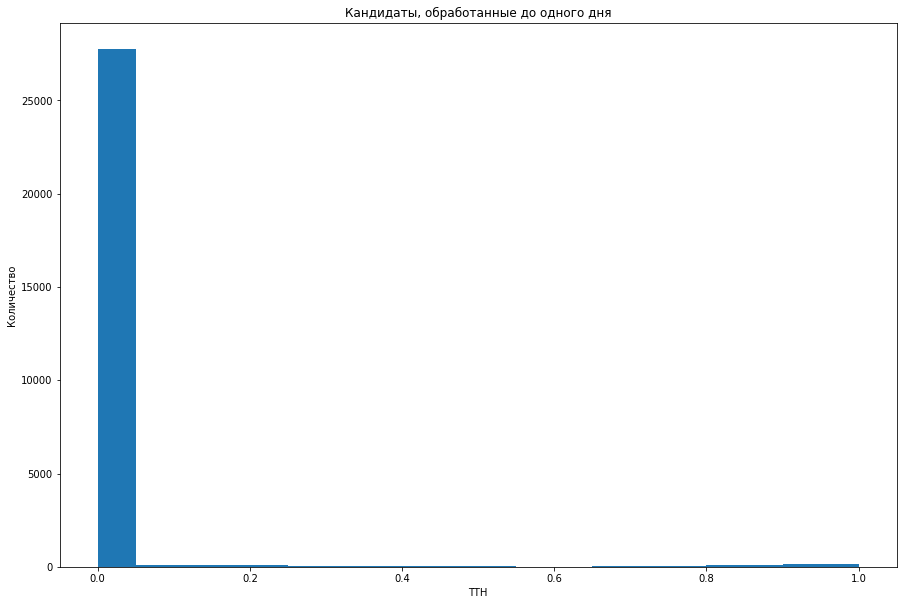

In [65]:
fig, ax = plt.subplots(1, 1,figsize=(15,10))
bins = 20
ax.hist(df_tth['TTH'][(df_tth['TTH']<=1)],bins=bins)
SetTTHLabels('Кандидаты, обработанные до одного дня')
plt.show()

In [34]:
# df_fits[df_fits['id_applicant'] == 2205452]

In [35]:
# df_tth[(df_tth['TTH']<0.0001)]

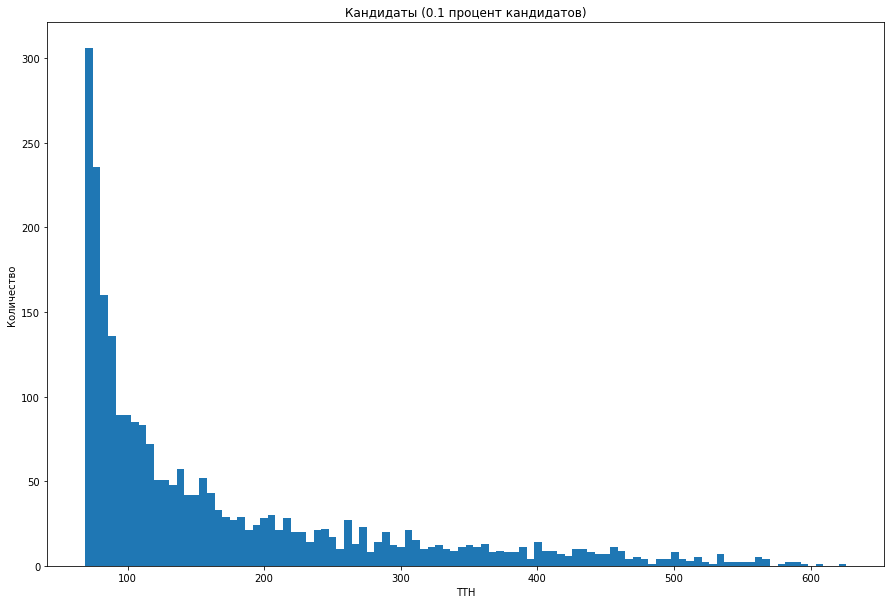

In [68]:
fig, ax = plt.subplots(1, 1,figsize=(15,10))
ax.hist(df_tth['TTH'][(df_tth['TTH']<5000)&(df_tth['TTH']>69)],bins=100)
SetTTHLabels('Кандидаты (0.1 процент кандидатов)')
plt.show()

In [69]:
# df_fits

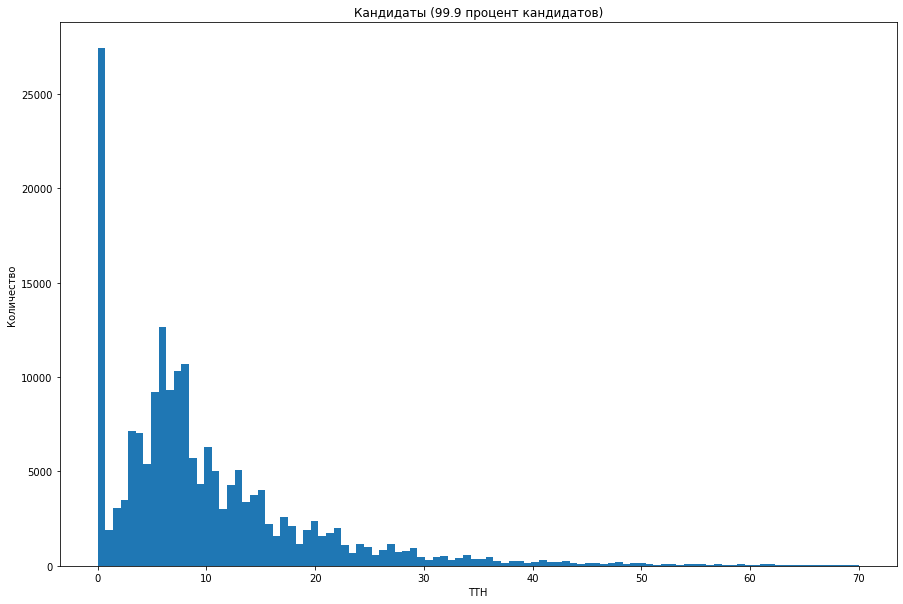

In [70]:
fig, ax = plt.subplots(1, 1,figsize=(15,10))
ax.hist(df_tth['TTH'][(df_tth['TTH']<70)& (df_tth['TTH']>0)], bins = 100)
SetTTHLabels('Кандидаты (99.9 процент кандидатов)')
plt.show()

In [71]:
df_fits['action_time'].quantile(.999)

68.2677492796434

In [72]:
df_tth['TTH'][df_tth['TTH']>100]

78        473.820724
129       134.243540
174       533.154021
187       370.023845
312       173.923378
             ...    
149411    100.938892
150358    105.030456
151363    106.354237
151727    106.162903
153141    112.194402
Name: TTH, Length: 1551, dtype: float64

In [73]:
# stage_name = 'Интервью с руководителем'
# stage_series = df_fits['action_time'][df_fits['stage_name'] == stage_name]
# time_threshold = stages_g.loc[stage_name]['75%']

# df.iloc[stage_series[stage_series.values > time_threshold].index]

In [74]:
# amount_applicant =  df_fits.groupby(['id_partner','id_applicant']).size().reset_index()
# amount_applicant =  amount_applicant.groupby(['id_partner'])['id_applicant'].count().reset_index()
# amount_applicant[amount_applicant['id_applicant']>3]

In [75]:
# df.iloc[df[df['stage_name'] == 'Групповое собеседование и тестирование'].index+1]
# print(len(stages[stages['count'] > stage_threshold]))
# df.iloc[df[df['action_time'] < 0].index + 1]
# df[df['activity_name'] == 'Провести первичную обработку']

In [57]:
df_min_date =df_fits.groupby(['id_applicant'])['action_date'].min().reset_index()
df_cohort = pd.merge(df_tth, df_min_date, how = 'left', on="id_applicant")
df_cohort.rename(columns = {'action_date':'creation_date'}, inplace = True)
fits_min =  df_fits[df_fits['result_name'] == 'Принят'].groupby(['id_applicant'])['action_date'].max().reset_index()
df_cohort = pd.merge(df_cohort, fits_min, how = 'left', on="id_applicant")
df_cohort.rename(columns = {'action_date':'applied_date'}, inplace = True)
# df_cohort['applied_date'] = df_cohort['applied_date'].dt.tz_localize(None)
# df_cohort['creation_date'] = df_cohort['creation_date'].dt.tz_localize(None)
date2018 = df_cohort['applied_date'].min().tzinfo.localize(pd.to_datetime(20180101, format='%Y%m%d'))
df_cohort['applied_date'] = (df_cohort['applied_date'] - date2018).dt.days % 365
df_cohort['creation_date'] = (df_cohort['creation_date'] - date2018).dt.days % 365

df_cohort.to_excel('cohort_new.xlsx')

<AxesSubplot:xlabel='weeks'>

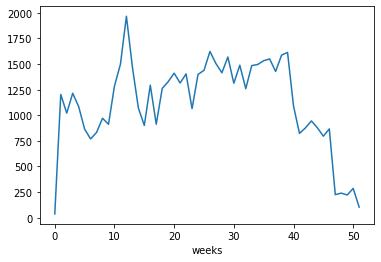

In [86]:
date2018 = df_cohort['action_date'].min().tzinfo.localize(pd.to_datetime(20180101, format='%Y%m%d'))
df_cohort['weeks'] = (df_cohort['action_date'] - date2018).dt.days
df_cohort['weeks'] = (df_cohort['weeks'] % 365 / 7).astype(int)
df_cohort['TTH_int'] = (df_cohort['TTH']/7).astype(int)
# df_cohort[(df_cohort['TTH_int']>0)&(df_cohort['TTH_int']<10)]
# retention_pivot = pd.DataFrame(df_cohort.pivot_table(index='weeks',
#                                         columns='TTH_int',
#                                         values='TTH',
#                                         aggfunc='count'))
# [(df_cohort['TTH_int']>0)&(df_cohort['TTH_int']<10)]
# retention_pivot
# retention_pivot[1].plot()
# retention_pivot[1].index + 1



In [127]:
# retention_pivot = pd.DataFrame(df_cohort.pivot_table(index='weeks',
#                                         columns='TTH_int',
#                                         values='TTH',
#                                         aggfunc='count'))
# [(df_cohort['TTH_int']>0)&(df_cohort['TTH_int']<10)]
# retention_pivot.to_excel('cohort.xlsx')
# retention_pivot[1].plot()
# retention_pivot[1].index + 1

In [29]:
# retention_pivot[1]

In [142]:
# df_cohort['TTH_int'].max()
# pd.DataFrame(20180101)

date = pd.to_datetime(20180101, format='%Y%m%d')
date = df_cohort['action_date'].min().tzinfo.localize(pd.to_datetime(20180101, format='%Y%m%d'))
date
# df_cohort['action_date'].min().tzinfo

Timestamp('2018-01-01 00:00:00+0000', tz='UTC')

In [84]:
import matplotlib.pyplot as plt

def showHist(data, grouped_data, column_name = 'stage_name', col_threshold = 0, is_special = True, xy = 4):
    
    fig, axs = plt.subplots(xy, xy, figsize=(20,15))
    i = 0
    not_special_const = 5
    
    for col in data[column_name].unique():
        series = data['action_time'][data[column_name] == col]
        time_threshold = not_special_const
        if is_special and col in grouped_data.index:
            time_threshold = grouped_data.loc[col]['75%']
        col_len = len(series)
    
        if col_len > col_threshold:
            x, y =divmod(i, xy)
            i+=1
#             axs[x,y].set_ylabel('Кол-во')
            axs[x,y].set_xlabel(f'{col}, {col_len}')
            series[series.values < time_threshold].hist(ax=axs[x,y],bins=100)
        print('.', end = '')
    plt.show()

def checkShowHist(data, grouped_data, column_name = 'stage_name', col_threshold = 0, is_special = True, xy = 4):
    
    not_special_const = 5
    if is_special and len(data[column_name].unique()) != len(grouped_data):
        print('Not all columns in grouped_data')
    
    i = 0
    for col in data[column_name].unique():
        series = data['action_time'][data[column_name] == col]
        col_len = len(series)
    
        if col_len > col_threshold:
            x, y =divmod(i, xy)
            if x > xy or y > xy:
                print(f'Too many columns in data for diagramm {xy}*{xy}')                
            i+=1

................

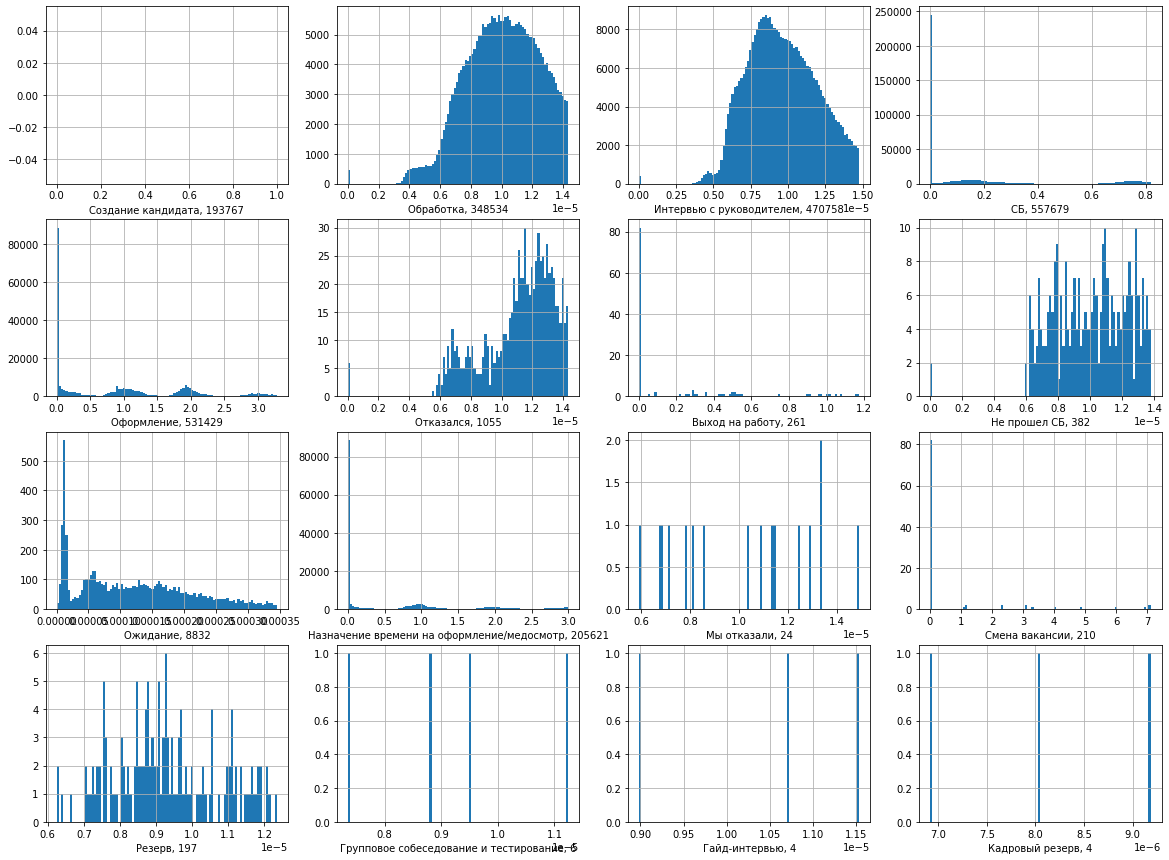

In [85]:
showHist(df_fits, stages_g, 'stage_name', stage_threshold)

.................

IndexError: index 4 is out of bounds for axis 0 with size 4

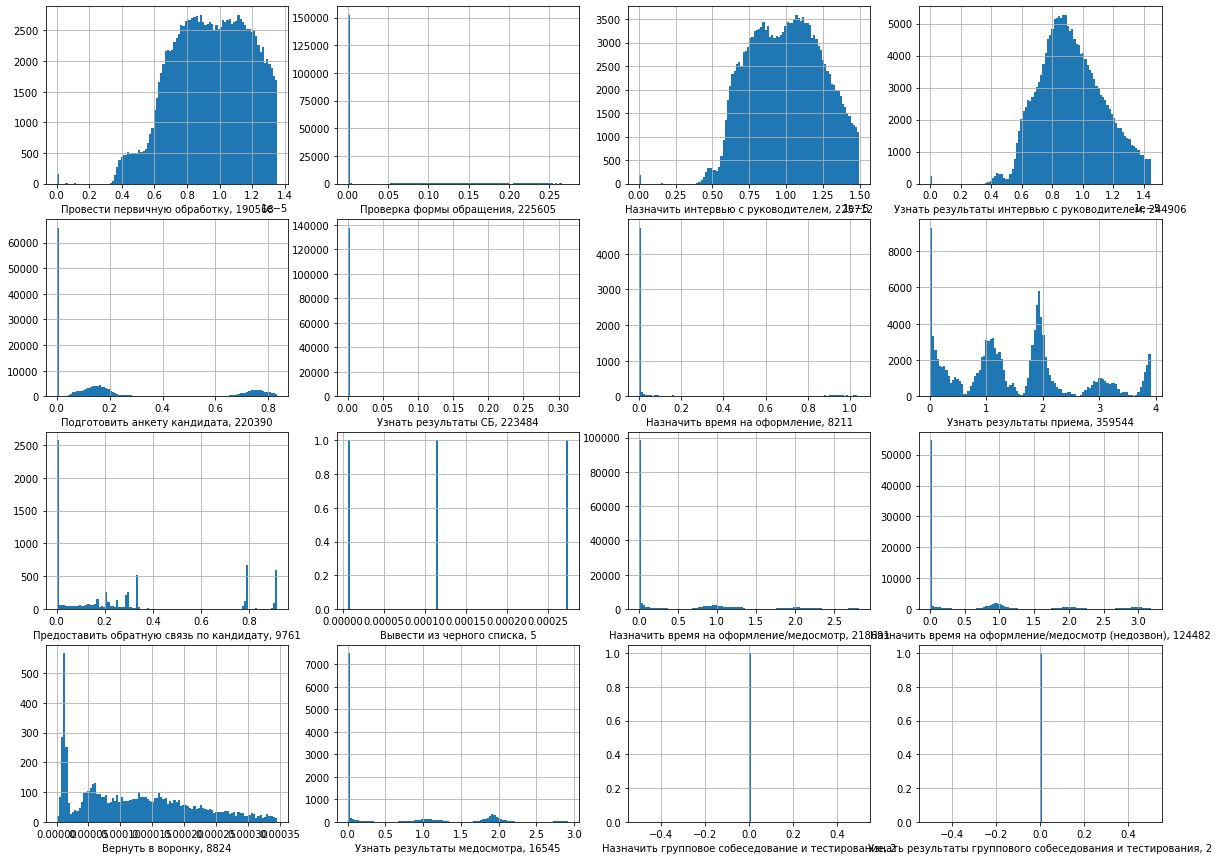

In [86]:
showHist(df_fits, activities_g, 'activity_name', activity_threshold, True)

.....................................

IndexError: index 6 is out of bounds for axis 0 with size 6

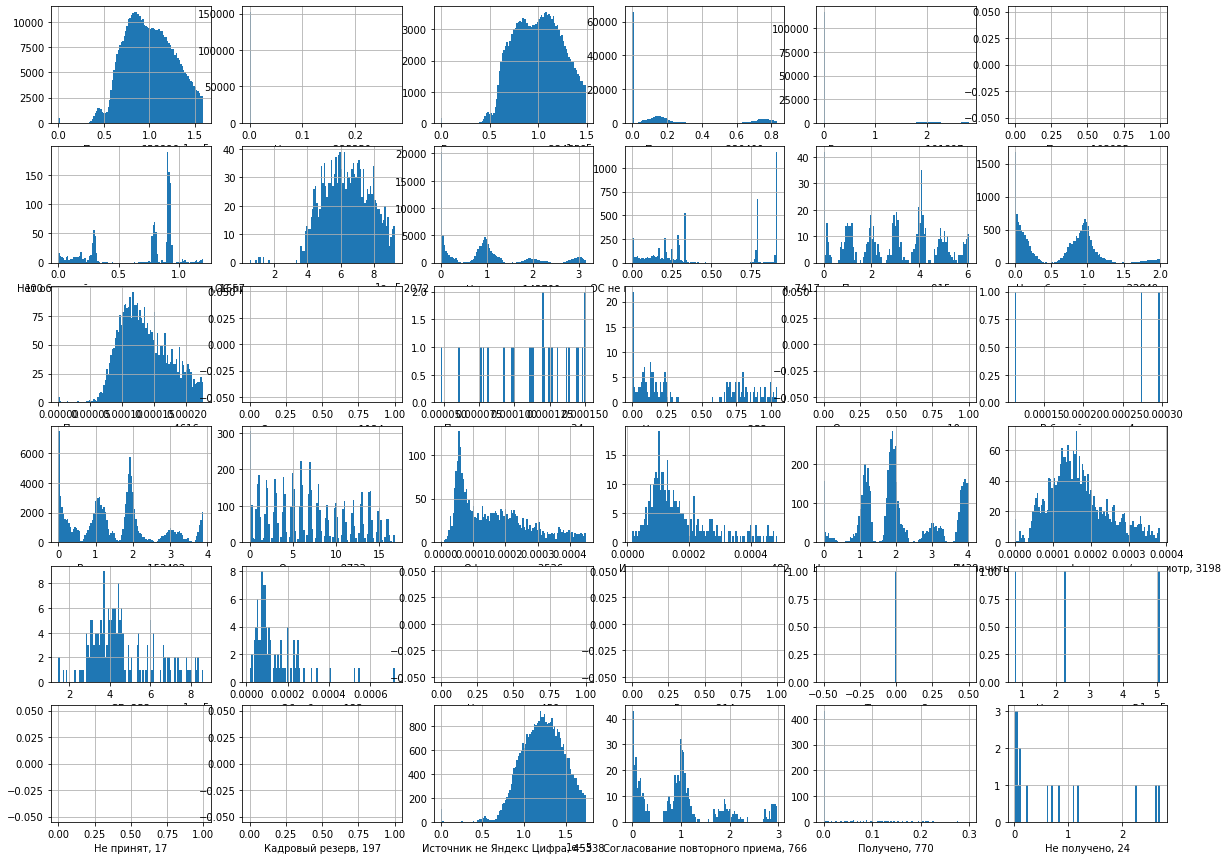

In [87]:
showHist(df_fits, results_g, 'result_name', result_threshold, True, 6)

# Замечание! 
заменить float значения колонки next_id на int

In [14]:
#df2020["next_id"] = df2020["next_id"].astype(int) # пишет что не может NaN сконвертить в инт, тут надо подумать

In [31]:
по stage_name других годов

array(['Создание кандидата', 'СБ', 'Обработка',
       'Назначение времени на оформление/медосмотр',
       'Интервью с руководителем', 'Оформление', 'Смена вакансии',
       'Отказался', 'Ожидание', 'Резерв', 'Не прошел СБ', 'Мы отказали',
       'Выход на работу', 'Кадровый резерв', 'Черный список',
       'Гайд-интервью', 'Групповое собеседование и тестирование',
       'Выход состоялся'], dtype=object)

In [34]:
по stage_name 2020

array(['Создание кандидата', 'Интервью с руководителем', 'Обработка',
       'Оформление', 'Смена вакансии', 'СБ', 'Не прошел СБ', 'Отказался',
       'Мы отказали', 'Резерв', 'Выход на работу', 'Черный список'],
      dtype=object)